**Instruction**:    
1. Download the ipynb, which you want to convert, on your local computer.    
2. Run the code below to upload the ipynb.  
3. The html version will be downloaded automatically on your local machine.

Enjoy it!

# Installing and importing the necessary libraries

In [14]:
#Installing the libraries with the specified version.
!pip install tensorflow==2.17.0 scikit-learn==1.3.1 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.26.0 pandas==2.2.2 -q --user

In [15]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.

from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.

import time  # Module for time-related operations.

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense   # for creating fully connected neural network layers.

In [16]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 2. Load your data (if not already loaded)
# Replace 'your_data.csv' with the actual path to your data file
data = pd.read_csv('/content/Churn.csv')

# 3. Define your features and target
# Replace 'features' and 'target' with your actual column names from your dataset
# Get a list of all columns in your DataFrame
all_columns = data.columns.tolist()

# Print the available columns to inspect them and choose your features
print("Available columns:", all_columns)

# Select your desired feature columns based on the available columns
# Make sure these column names exactly match the ones in your DataFrame
# For example, if the column name is 'CustomerID' in your data, use 'CustomerID' here
features = ['customerID', 'gender', 'Partner']  # Replace with your actual feature columns

# Make sure the case (uppercase/lowercase) is correct
# If your target column is 'Churn' in your data, use 'Churn' here
target = 'Churn'  # Replace with your actual target column

# 4. Split the data into training and testing sets
# Before accessing the columns, convert them to the correct case if needed:
features = [col.strip() for col in features]  # Strip leading/trailing

Available columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [19]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD # Assuming you want to import SGD as well, adjust if needed.

# Loading the data

In [20]:
#Loading the dataset from tensorflow datasets.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Data Overview

In [21]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [22]:
import os
print(os.listdir('/content/drive/MyDrive'))

['Colab Notebooks', '.ipynb_checkpoints', 'InteractiveSheet_2024-09-25_22_53_09.gsheet', '2_BankChurners.ipynb']


In [23]:
import pandas as pd

# Assuming your data is in a CSV file named 'Churn.csv' in the current directory
data_pd = pd.read_csv('/content/Churn.csv')  # Load the data into 'data_pd'
data_pd.head()  # Now this should work

# Alternatively, if you want to use 'data' for consistency:
data = pd.read_csv('/content/Churn.csv')  # Load the data into 'data'
data.head()  # Now this should work

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [27]:
data.duplicated().sum()

0

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [29]:
import pandas as pd

# Assuming your data is in a CSV file named 'Churn.csv'
data = pd.read_csv('/content/Churn.csv')

# Print the column names to verify the exact name of the column
print(data.columns)

# Drop the 'CustomerID' column, adjusting the name if needed
# If the actual column name has leading/trailing spaces or different capitalization,
# use the exact name as printed by the previous line
# For example, if the column name is 'customerID' instead of 'CustomerID', change the line below to:
# data = data.drop('customerID', axis=1)
data = data.drop(data.columns[1], axis=1)  # Using data.columns[1] to drop the second column assuming 'CustomerID' is the second column

# Reset the index to remove the row numbers
data = data.reset_index(drop=True)

# Display the first few rows of the modified DataFrame
data.head()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


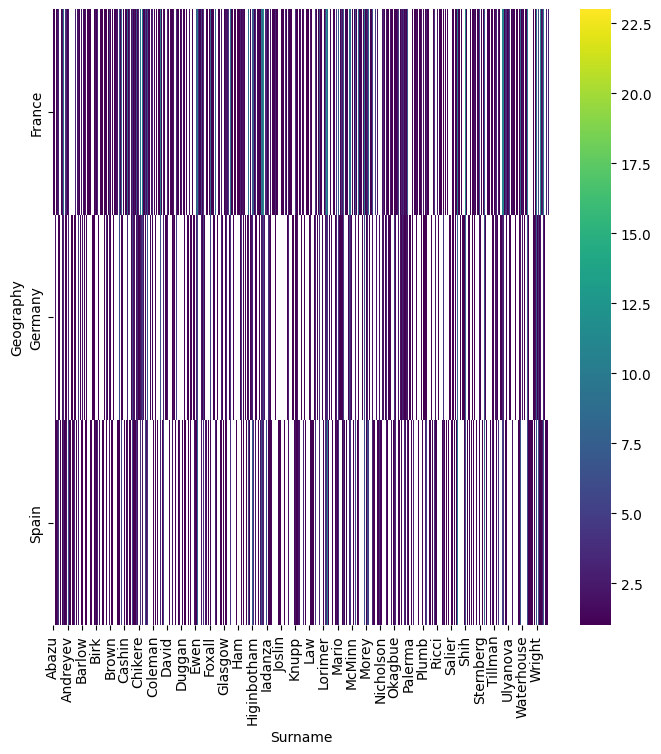

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is the DataFrame you want to use
plt.subplots(figsize=(8, 8))

# Replacing '_df_46' with 'data'
df_2dhist = pd.DataFrame({
    x_label: grp['Geography'].value_counts()
    for x_label, grp in data.groupby('Surname')
})

sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Surname')
_ = plt.ylabel('Geography')

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.500000,2886.895680,1.00,2500.75,5000.500,7500.2500,10000.00
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


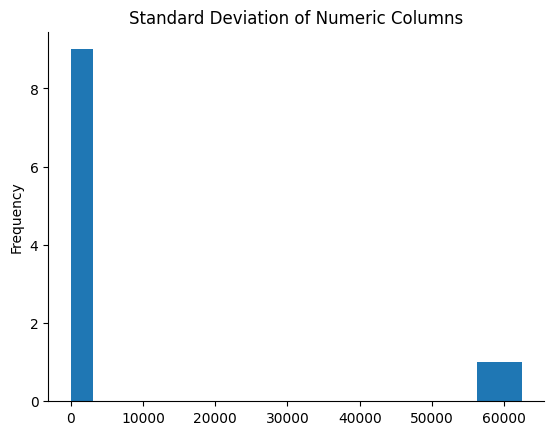

In [37]:
from matplotlib import pyplot as plt

# Calculate the standard deviation for each numeric column and store it in a new DataFrame
std_df = data.select_dtypes(include=['number']).std()  # Select only numeric columns

# Access the standard deviation values using the column index 'std'
std_df.plot(kind='hist', bins=20, title='Standard Deviation of Numeric Columns')
plt.gca().spines[['top', 'right']].set_visible(False)

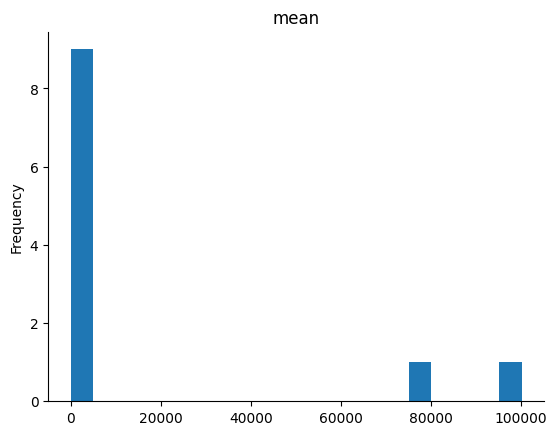

In [39]:
from matplotlib import pyplot as plt
import pandas as pd

# Assuming 'data' is your original DataFrame
# Replace this with the appropriate logic to calculate the mean for each column
# For example, to calculate mean of numeric columns:
_df_16 = pd.DataFrame(data.select_dtypes(include=['number']).mean(), columns=['mean'])

_df_16['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

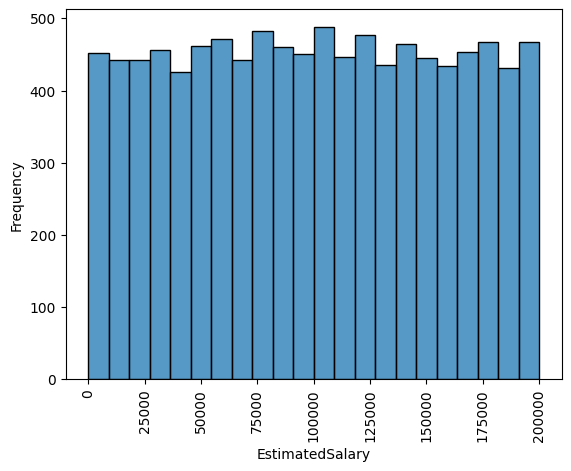

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a CSV file named 'your_data.csv'
# Replace 'your_data.csv' with the actual file path
data = pd.read_csv('/content/Churn.csv')

# Create the histogram
# We only need to specify the 'x' value here since seaborn
# automatically calculates the frequency for each bin.
sns.histplot(data=data, x='EstimatedSalary')

plt.xticks(rotation=90)
plt.ylabel('Frequency') # Optionally, label the y-axis for clarity
plt.show()

In [41]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Define the bins and labels for the salary groups
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000]
labels = ['<25000', '<50000', '<75000', '<100000', '<125000', '<150000', '<175000', '<200000']

# Create the new column 'SalaryGroup' using pd.cut
data['SalaryGroup'] = pd.cut(data['EstimatedSalary'], bins=bins, labels=labels, include_lowest=True)

# Now you can use the 'SalaryGroup' column for analysis or visualization
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited SalaryGroup  
0        101348.88       1     <125000  
1        112542.58       0     <125000  
2        113931.57       1     <125

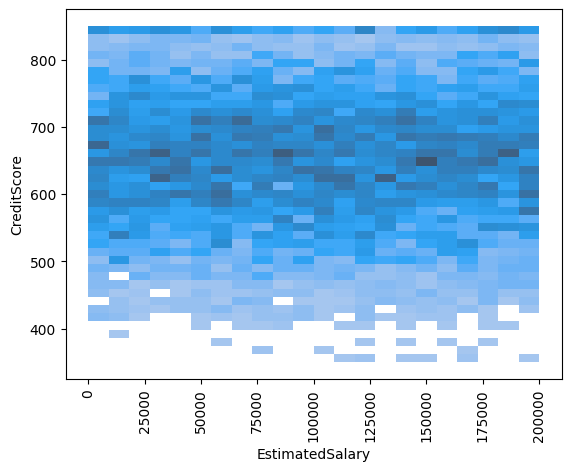

In [42]:
sns.histplot(data=data,x='EstimatedSalary',y='CreditScore')
plt.xticks(rotation=90)
plt.show()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


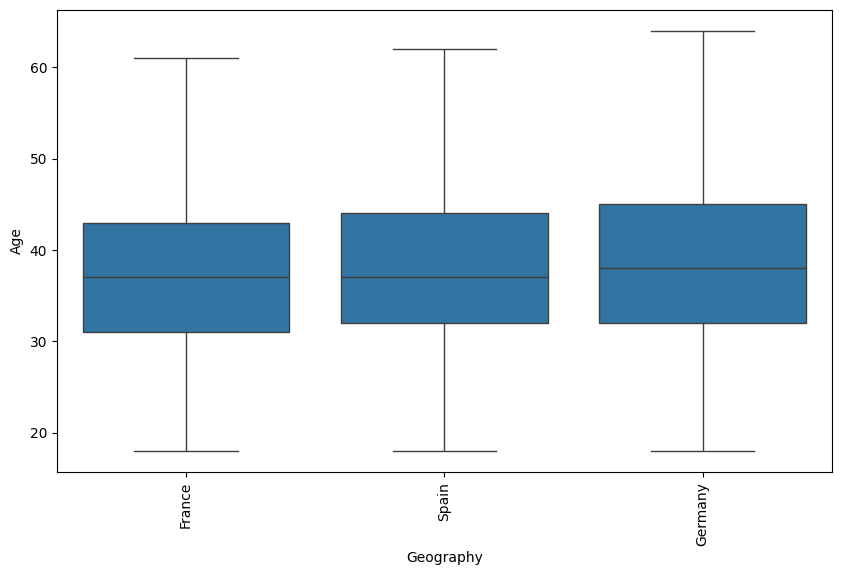

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Churn.csv') # Use pd.read_csv to read the file

# Print the column names to verify if 'Geograph' exists and check for typos.
print(data.columns)

plt.figure(figsize=(10,6))

# If the column name is misspelled, correct it here.
# For example, if the correct name is 'Geography':
sns.boxplot(data=data, x='Geography', y='Age', showfliers=False) # Use showfliers to hide outlier points

plt.xticks(rotation=90)
plt.show()

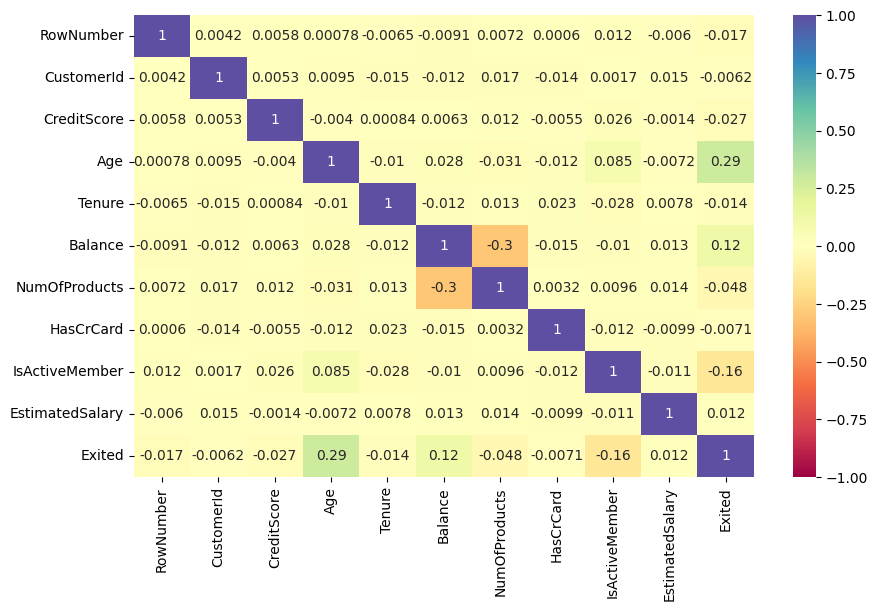

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

sns.heatmap(numerical_data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)

plt.xticks(rotation=90)
plt.show()

# Data Preprocessing

In [45]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Get the actual name of your target column from the DataFrame
target_column = data.columns[-1]  # Assuming target is the last column

# Assuming 'data' is your DataFrame and 'target_column' is the name of your target column
# Replace 'target_column' with the actual name
# For example, if your target column is named 'TargetVariable', use:
X = data.drop(target_column, axis=1)  # Use the actual target column name
y = data[target_column]  # Use the actual target column name

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preparation for Modeling

# Data Overview

In [46]:
print(y_test.shape)#Printing the shape of the data.
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(2000,)
(8000, 13)
(8000,)
(2000, 13)


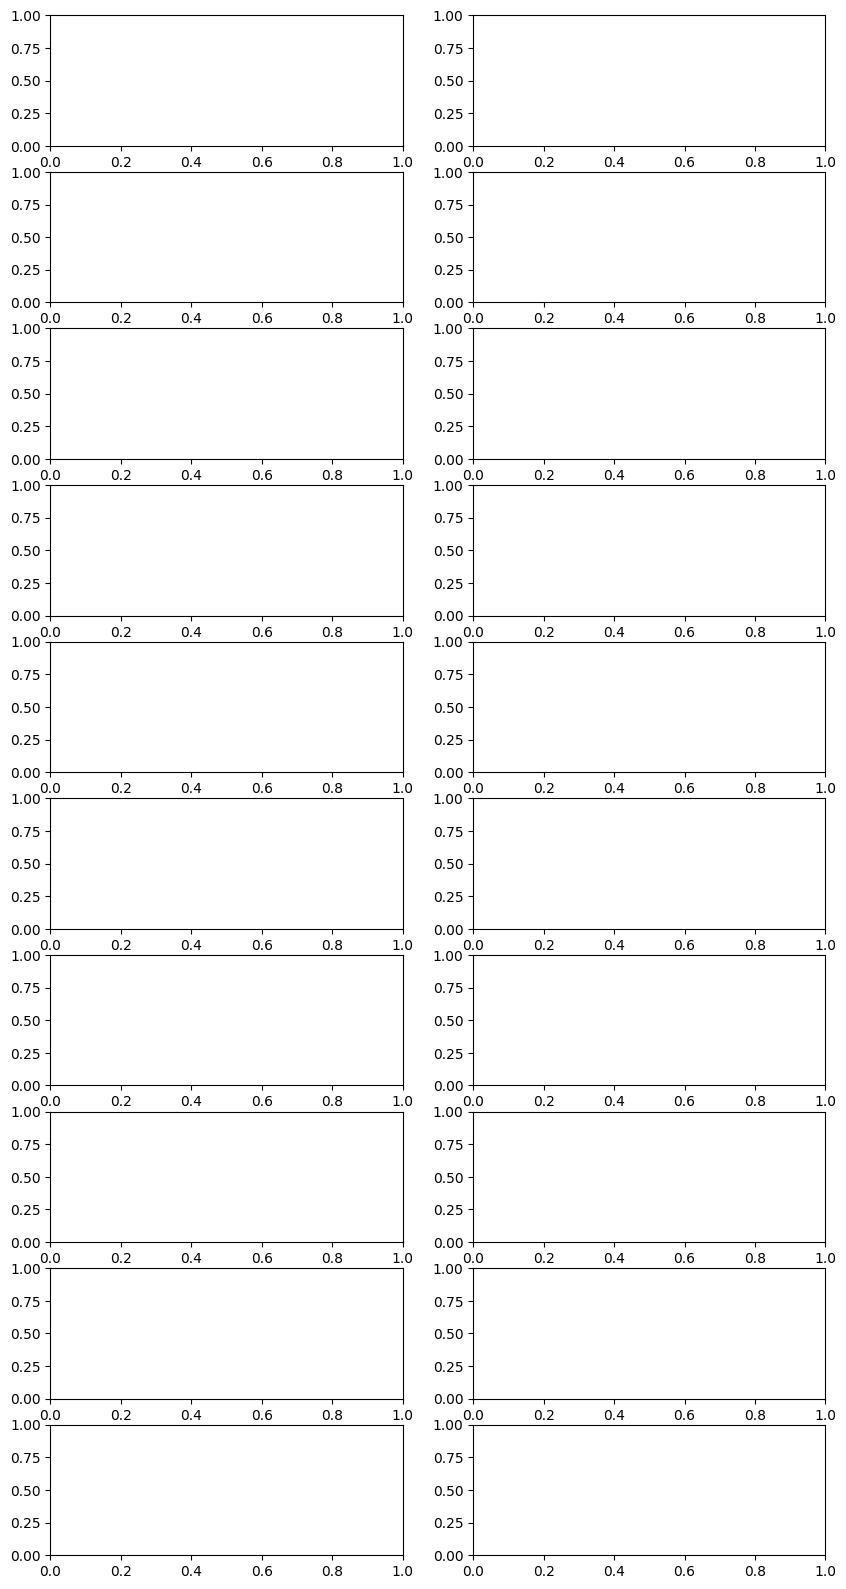

In [47]:
!pip install matplotlib

import matplotlib.pyplot as plt

f, axarr = plt.subplots(10, 2, figsize=(10, 20))  # Grid of size 10*20, with 10 rows and 2 columns

for i in range(10):  # For each digit
    images = x_train[y_train == i]

# Data Scaling

In [48]:
#Printing the maximum value and the minimum value of the independent variable.
print(x_train.max(),x_test.max()) # Removed x_val.max()
print(x_train.min(),x_test.min()) # Removed x_val.min()
#You likely intended to work with a validation set (x_val)
#To fix the error, you need to create this validation set by splitting your original data.
#One way to achieve this is using the train_test_split function from scikit-learn

#Example:
#from sklearn.model_selection import train_test_split
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42) #Adjust test_size and random_state as needed

#Then you'll be able to use x_val:
#print(x_train.max(),x_test.max(),x_val.max())
#print(x_train.min(),x_test.min(),x_val.min())

RowNumber              10000
CustomerId          15815660
Surname                Zuyev
CreditScore              850
Geography              Spain
Gender                  Male
Age                       92
Tenure                    10
Balance            250898.09
NumOfProducts              4
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    199970.74
dtype: object RowNumber               9999
CustomerId          15815690
Surname               Zuyeva
CreditScore              850
Geography              Spain
Gender                  Male
Age                       92
Tenure                    10
Balance            216109.88
NumOfProducts              4
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    199992.48
dtype: object
RowNumber                 2
CustomerId         15565701
Surname               Abazu
CreditScore             350
Geography            France
Gender               Female
Age                      18
Tenure                

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming x_train and x_test are your dataframes

# Split x_train into x_train and x_val
x_train, x_val, _, _ = train_test_split(x_train, x_train.index, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Replace non-numeric values with NaN and then convert to numeric
for column in x_train.select_dtypes(include=['object']).columns:
    x_train[column] = pd.to_numeric(x_train[column], errors='coerce')
    x_val[column] = pd.to_numeric(x_val[column], errors='coerce')
    x_test[column] = pd.to_numeric(x_test[column], errors='coerce')

# Impute NaN values with the mean of the column or another suitable strategy
# You can choose a different strategy like median, mode, or a constant value
# Excluding 'Surname' column from mean imputation
for column in x_train.select_dtypes(include=['number']).columns:
    if column != 'Surname':  # Exclude 'Surname' column
        x_train[column] = x_train[column].fillna(x_train[column].mean())
        x_val[column] = x_val[column].fillna(x_val[column].mean())
        x_test[column] = x_test[column].fillna(x_test[column].mean())

# Now you can safely normalize
# Excluding 'Surname' column from normalization
numeric_columns = [col for col in x_train.columns if col != 'Surname' and x_train[col].dtype in [np.float64, np.int64]]
x_train[numeric_columns], x_val[numeric_columns], x_test[numeric_columns] = x_train[numeric_columns].astype("float32")/(255), x_val[numeric_columns].astype("float32")/(255), x_test[numeric_columns].astype("float32")/(255)

In [50]:
#Printing the maximum value and the minimum value of the independent variable.
print(x_train.max(),x_test.max(),x_val.max())
print(x_train.min(),x_test.min(),x_val.min())

RowNumber             39.207844
CustomerId         62022.195312
Surname                     NaN
CreditScore            3.333333
Geography                   NaN
Gender                      NaN
Age                    0.325490
Tenure                 0.039216
Balance              934.853210
NumOfProducts          0.015686
HasCrCard              0.003922
IsActiveMember         0.003922
EstimatedSalary      784.198975
dtype: float64 RowNumber             39.211765
CustomerId         62022.312500
Surname                     NaN
CreditScore            3.333333
Geography                   NaN
Gender                      NaN
Age                    0.360784
Tenure                 0.039216
Balance              847.489685
NumOfProducts          0.015686
HasCrCard              0.003922
IsActiveMember         0.003922
EstimatedSalary      784.284241
dtype: float64 RowNumber             39.215687
CustomerId         62022.019531
Surname                     NaN
CreditScore            3.333333
Geography 

# Reshaping the input

We need to reshape the image data from (𝑛,ℎ,𝑤) to (𝑛,ℎ∗𝑤) , where 𝑛 = number of images in the dataset ℎ = height of the image 𝑤 = width of the image
# For example, image data of dimension (50000,28,28) is transformed to (50000,28∗28) , i.e., (50000,784) .

In [51]:
#Reshaping the image data
x_train = x_train.values.reshape(x_train.shape[0],-1)
x_val = x_val.values.reshape(x_val.shape[0],-1)
x_test = x_test.values.reshape(x_test.shape[0],-1)

In [52]:
print(x_train.shape[0], "train samples") # Changed x_trapin to x_train
print(x_val.shape[0], "validation samples")
print(x_test.shape[0], "test samples")

6400 train samples
1600 validation samples
2000 test samples
